## Опишите теоретическую модель случайного леса.

Случайный лес — ансамблевый алгоритм, включающий в себя несколько деревьев решений. Каждое дерево решений обучается на своей подвыборке основной выборки, называемой *bootstrap-выборкой*. При этом ответом в случае регрессии считается среднее арифметическое ответов всех деревьев, а в случае классификации — ответ, который «выбрало» наибольшее число деревьев.

*Bootstrap-выборка* строится следующим образом. Из выборки выбирается некоторое количество случайных различных строчек (обычно около 60%). Далее из выбранного набора случайным образом выбираются элементы до тех пор, пока длина bootstrap-выборки не совпадёт с количеством элементов исходной выборки.

### Построение дерева решений

Теперь для каждого дерева известно, на какой выборке оно будет обучаться. Обучение дерева происходит следующим образом.

В каждой вершине выбирается $m=\sqrt{d}$ подпризнаков из исходного количества $d$ признаков в выборке в случае задачи кластеризации и $m=d/3$ в случае задачи регресиии. Из этого количества признаков выбирается *один*, который будет определять левое и правое *поддеревья* выбранной вершины. Также выбирается *проговое значение*. Если вновь пришедшее наблюдение по выбранному признаку имеет значение меньше порогового, оно отправляется влево, иначе в правое. Это происходит, пока в каждой вершине не останется один объект (для классификации) или менее 5 объектов (для регрессии).

*Признак* и *пороговое значение* определеяются из минимизации специальной функции, называемой качеством, имеющий следующий вид:
$$Q(X,j,t)=H(X)-\frac{|X_l|}{|X|}H(X_l)-\frac{|X_r|}{|X|}H(X_r),$$
где
* $X$ — выборка текущей вершины дерева;
* $X_r$ — элементы, которые попадают в левое поддерево;
* $X_l$ — элементы, попадающие в правое поддерево;
* $|\cdot|$ — мощность множества.

$H(X)$ определяется для задач регрессии и классификации по разному.

В случае регрессии принято вбирать $H(X)$ *оценкой дисперсии* в выборке
$$H(X)=\frac{1}{|X|}\sum\limits_{i\in X}(y_i-\overline{y}(X))^2$$

В случае классификации есть несколько вариантов, которые используют *оценку вероятности* для выборки. Далее будем её обозначать $p_k$ для объектов класса $k$.

*Критерий Джини* 
$$H(X)=\sum\limits_{k=1}^{N}p_k(1-p_k).$$

*Энтропия Шеннона*
$$H(X)=-\sum\limits_{k=1}^{N}p_k\log{p_k},$$
где по непрерывности предполагается $0\log{0}=0$.

## Напишите следующий код: сгенерируйте данные в виде набора точек по нескольким кластерам; выполните кластеризацию; визуализируйте результат.

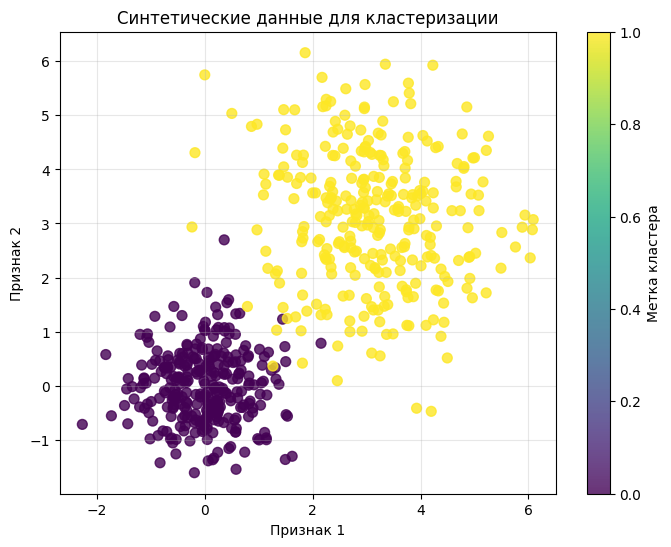

In [5]:
import numpy as np
import matplotlib.pyplot as plt

n_points = 300
np.random.seed(42)

cluster1 = np.random.randn(n_points, 2) * 0.7

cluster2 = np.random.randn(n_points, 2) * 1.2 + [3, 3]

X = np.vstack([cluster1, cluster2])
y = np.hstack([np.zeros(n_points), np.ones(n_points)])  # метки

# Визуализация
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', s=50, alpha=0.8)
plt.title("Синтетические данные для кластеризации")
plt.xlabel("Признак 1")
plt.ylabel("Признак 2")
plt.colorbar(label='Метка кластера')
plt.grid(alpha=0.3)
plt.show()


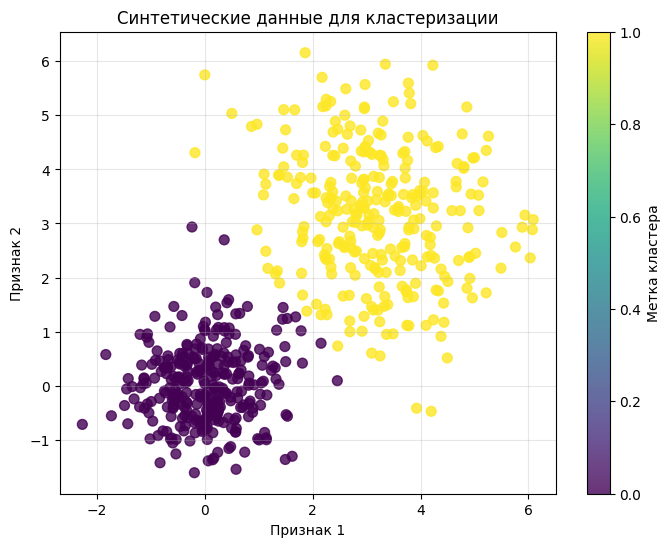

In [6]:
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler

StSc = StandardScaler()
X_scaled = StSc.fit_transform(X)

kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=kmeans_labels, cmap='viridis', s=50, alpha=0.8)
plt.title("Синтетические данные для кластеризации")
plt.xlabel("Признак 1")
plt.ylabel("Признак 2")
plt.colorbar(label='Метка кластера')
plt.grid(alpha=0.3)
plt.show()

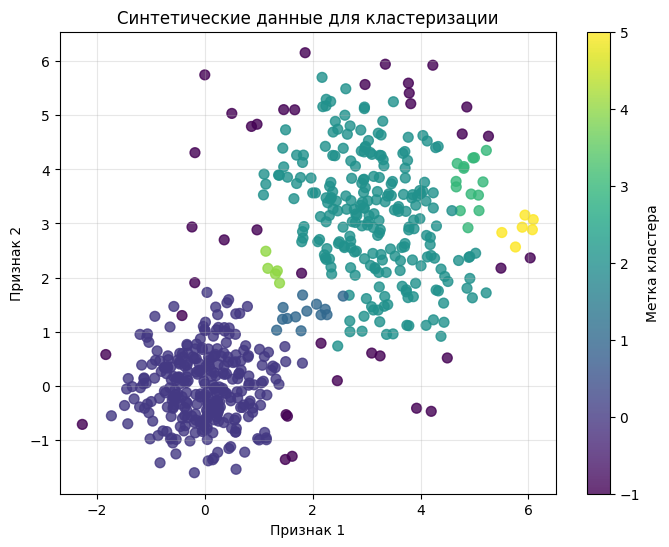

In [16]:
dbscan = DBSCAN(eps=0.225, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=dbscan_labels, cmap='viridis', s=50, alpha=0.8)
plt.title("Синтетические данные для кластеризации")
plt.xlabel("Признак 1")
plt.ylabel("Признак 2")
plt.colorbar(label='Метка кластера')
plt.grid(alpha=0.3)
plt.show()

## Опишите метрику для проверки качества алгоритмов регрессии.

Пусть $\hat{y_i}$ — предсказанное значение, $y_i$ — истинное, $i=\overline{1,l}$. Основными метриками для проверки качества предсказания будут следующие:

1. **MSE** — среднеквадратичное отклонение
$$MSE=\frac{1}{l}\sum\limits_{i=1}^{l}(\hat{y_i}-y_i)^2$$
2. **RMSE** — корень из среднеквадратичного отклонения
$$RMSE=\sqrt{\frac{1}{l}\sum\limits_{i=1}^{l}(\hat{y_i}-y_i)^2}$$
3. **MAE** — среднее отклонение
$$MAE=\frac{1}{l}\sum\limits_{i=1}^{l}|\hat{y_i}-y_i|$$

Первые два критерия ялвяются дифференцируемыми (а потому удобными для градиентного спуска), но имеют большую чувствительность к выбросам. Последняя метрика не обладает этим недостатком, однако требует доопределения производной при $\hat{y_i}=y_i$. В этом случае она определяется нулём.